
            STUDENT PERFORMANCE PREDICTION SYSTEM WITH VISUALIZATION            
                          MODEL KNOWING G1 & G2 SCORES                          

📊 Mean Cross-Validation Accuracy: 91.78%
✅ Test Accuracy: 92.41%
--------------------------------------------------------------------------------

Confusion Matrix:
[[23  2]
 [ 4 50]]

False Pass Rate: 0.08
False Fail Rate: 0.074

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88        25
           1       0.96      0.93      0.94        54

    accuracy                           0.92        79
   macro avg       0.91      0.92      0.91        79
weighted avg       0.93      0.92      0.92        79



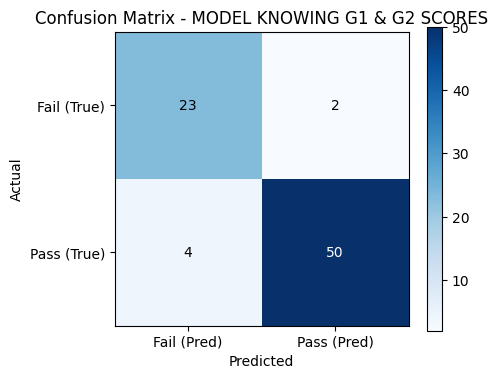

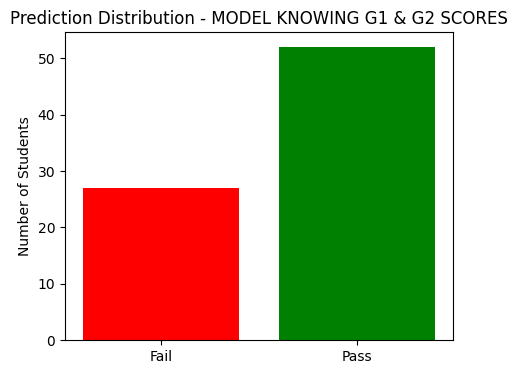



                          MODEL KNOWING ONLY G1 SCORE                           

📊 Mean Cross-Validation Accuracy: 83.23%
✅ Test Accuracy: 86.08%
--------------------------------------------------------------------------------

Confusion Matrix:
[[22  3]
 [ 8 46]]

False Pass Rate: 0.12
False Fail Rate: 0.148

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.88      0.80        25
           1       0.94      0.85      0.89        54

    accuracy                           0.86        79
   macro avg       0.84      0.87      0.85        79
weighted avg       0.87      0.86      0.86        79



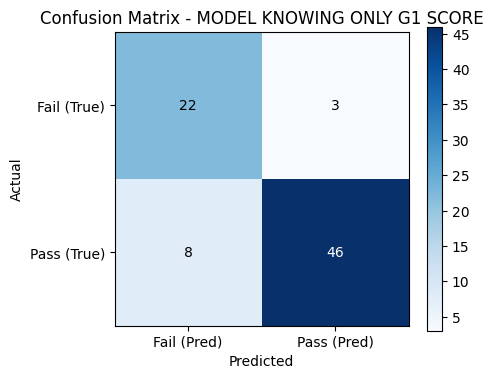

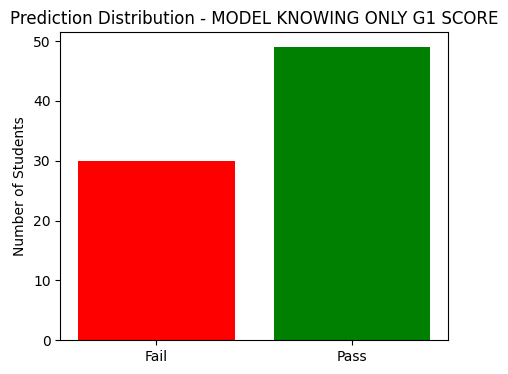



                        MODEL WITHOUT KNOWING ANY SCORES                        

📊 Mean Cross-Validation Accuracy: 70.57%
✅ Test Accuracy: 73.42%
--------------------------------------------------------------------------------

Confusion Matrix:
[[ 5 20]
 [ 1 53]]

False Pass Rate: 0.8
False Fail Rate: 0.019

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.20      0.32        25
           1       0.73      0.98      0.83        54

    accuracy                           0.73        79
   macro avg       0.78      0.59      0.58        79
weighted avg       0.76      0.73      0.67        79



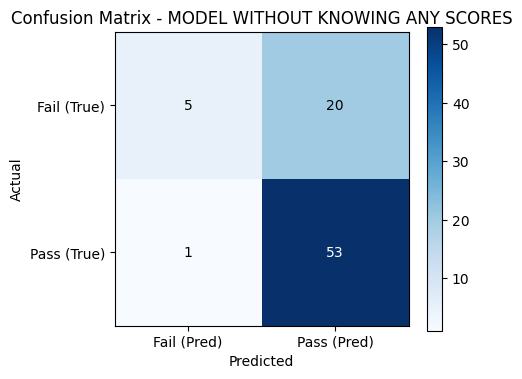

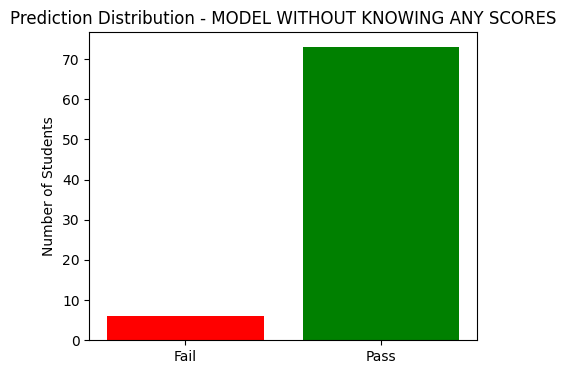

In [5]:
"""
Enhanced Student Performance Prediction - Mathematics (with Visualization)
------------------------------------------------------------------------------
Goal:
Predict whether a student will pass or fail a mathematics course based on 
academic and socio-demographic features, and visualize the prediction outcomes.

Includes:
✅ Model training using SVM
✅ Cross-validation accuracy
✅ Confusion Matrix and Classification Metrics
✅ Graphs for Pass/Fail predictions across all scenarios
------------------------------------------------------------------------------
"""

# --- Import Required Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import LinearSVC

# --- Read Dataset ---
df = pd.read_csv("student-mat.csv", sep=";")

# --- Split Data Function ---
def split_data(X, Y):
    return train_test_split(X, Y, test_size=0.2, random_state=17)

# --- Confusion Matrix and Evaluation ---
def confuse(y_true, y_pred, scenario):
    cm = confusion_matrix(y_true=y_true, y_pred=y_pred)

    # --- Rates ---
    fp = cm[0][1]
    tf = cm[0][0]
    ff = cm[1][0]
    tp = cm[1][1]
    false_pass_rate = round(fp / (fp + tf), 3)
    false_fail_rate = round(ff / (ff + tp), 3)

    # --- Display Metrics ---
    print("\nConfusion Matrix:")
    print(cm)
    print(f"\nFalse Pass Rate: {false_pass_rate}")
    print(f"False Fail Rate: {false_fail_rate}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    # --- Visualization: Confusion Matrix ---
    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {scenario}")
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Fail (Pred)', 'Pass (Pred)'])
    plt.yticks(tick_marks, ['Fail (True)', 'Pass (True)'])
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, cm[i, j], ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # --- Visualization: Pass/Fail Distribution ---
    labels = ["Fail", "Pass"]
    counts = [np.sum(y_pred == 0), np.sum(y_pred == 1)]
    plt.figure(figsize=(5, 4))
    plt.bar(labels, counts, color=["red", "green"])
    plt.title(f"Prediction Distribution - {scenario}")
    plt.ylabel("Number of Students")
    plt.show()

# --- Train, Evaluate and Visualize ---
def train_and_score(X, y, scenario):
    X_train, X_test, y_train, y_test = split_data(X, y)

    clf = Pipeline([
        ('reduce_dim', SelectKBest(chi2, k=2)),
        ('train', LinearSVC(C=100, max_iter=5000))
    ])

    scores = cross_val_score(clf, X_train, y_train, cv=5, n_jobs=2)
    mean_acc = np.array(scores).mean()

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)

    # --- Output Formatting ---
    print("=" * 80)
    print(f"{scenario.center(80)}")
    print("=" * 80)
    print(f"\n📊 Mean Cross-Validation Accuracy: {mean_acc*100:.2f}%")
    print(f"✅ Test Accuracy: {test_acc*100:.2f}%")
    print("-" * 80)
    
    confuse(y_test, y_pred, scenario)
    print("=" * 80, "\n\n")

# --- Main Program ---
def main():
    print("\n" + "="*80)
    print("STUDENT PERFORMANCE PREDICTION SYSTEM WITH VISUALIZATION".center(80))
    print("="*80)

    # Encode categorical columns
    class_le = LabelEncoder()
    for column in ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob",
                   "reason", "guardian", "schoolsup", "famsup", "paid", "activities",
                   "nursery", "higher", "internet", "romantic"]:
        df[column] = class_le.fit_transform(df[column].values)

    # Encode G1, G2, G3 as binary pass/fail
    df["G1"] = (df["G1"] >= 10).astype(int)
    df["G2"] = (df["G2"] >= 10).astype(int)
    df["G3"] = (df["G3"] >= 10).astype(int)

    y = df.pop("G3")
    X = df.copy()

    # --- Run three scenarios ---
    train_and_score(X, y, "MODEL KNOWING G1 & G2 SCORES")

    X_wo_G2 = X.drop(["G2"], axis=1)
    train_and_score(X_wo_G2, y, "MODEL KNOWING ONLY G1 SCORE")

    X_wo_G1G2 = X.drop(["G1", "G2"], axis=1)
    train_and_score(X_wo_G1G2, y, "MODEL WITHOUT KNOWING ANY SCORES")

# --- Execute Program ---
main()
